# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

Vehicle Sales Ad Data Analysis.

This script analyses vehicle ads of a number of type of vehicles with various parameters.
it shows the factors that influence the pricing of vehicles with respect to their correlation.

Content:
- Data Import
- Data Preprocessing
    - Filling of Missing values
    - Addition of relevant columns
    - Filtering out non_usable entries
- Exploratory Data Analysis
    - Ads lifetime analysis
    - Price and Mileage, Age, Condition and type correlation
- Conclusion

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
vehicles_us = pd.read_csv('/datasets/vehicles_us.csv')
vehicles_us.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusion

The maximum amount of entries is 51525. All columns less than that value have missing values
There are several coulms with missing values:
model_year, cylinders, odometer, paint_color, is_4wd. 
I need to investigate the missing values and know which can be filled and which should be left.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, data is downloaded and ready for the further preparation and analysis.
</div>

### Step 2. Data preprocessing

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'vehicle_mileage'),
 Text(0.5, 1.0, 'Number of Ads per mileage')]

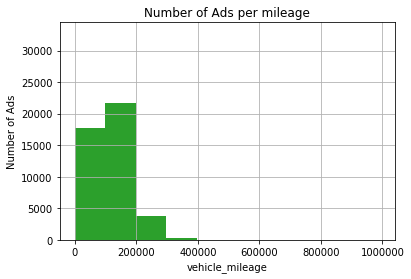

In [2]:
#vehicles_us.isna().sum()  #spotted the columns with missing values
#print(vehicles_us['model_year'].max(), vehicles_us['model_year'].min())
#print(vehicles_us[vehicles_us['model_year'].isna()])
#print(vehicles_us[vehicles_us['model_year'].isna()]['model'].value_counts())
#print(vehicles_us['model'].value_counts())
# there are 100 unique car models. 
vehicles_us['model_year'].hist()  
vehicles_us['cylinders'].hist()   
vehicles_us['odometer'].hist().set(xlabel="vehicle_mileage", ylabel="Number of Ads", title = 'Number of Ads per mileage')   

In [3]:
print(vehicles_us.isna().sum())
print(vehicles_us.isna().sum().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64
51991


In [4]:
vehicles_us['model_year'] = vehicles_us.groupby(['model'])['model_year'].apply(lambda grp:grp.fillna(grp.mode()[0]))
vehicles_us['odometer'] = vehicles_us.groupby(['model'])['odometer'].apply(lambda grp:grp.fillna(grp.median()))
vehicles_us['odometer'] = vehicles_us.groupby(['model_year'])['odometer'].apply(lambda grp:grp.fillna(grp.median()))
vehicles_us['paint_color'] = vehicles_us.groupby(['model'])['paint_color'].apply(lambda grp:grp.fillna(grp.mode()[0]))
vehicles_us['cylinders'] = vehicles_us.groupby(['model'])['cylinders'].apply(lambda grp:grp.fillna(grp.mode()[0]))

#model_year should not be float64. It should be converted to year
#cylinders should not be float64,int8 would suffice
#is_4wd should not be float6, it can be a boolean or an int
#date_posted should be converted to_timedate
#days listed can be int32

vehicles_us['cylinders']  = vehicles_us['cylinders'].astype('Int16')

vehicles_us['model_year']  = vehicles_us['model_year'].astype('Int16')

vehicles_us['date_posted']  = pd.to_datetime(vehicles_us['date_posted'])

vehicles_us['days_listed']  = vehicles_us['days_listed'].astype(dtype = int,errors = 'ignore')

vehicles_us['is_4wd']  = vehicles_us['is_4wd'].astype(dtype = int,errors = 'ignore')


#vehicles_us[vehicles_us['odometer'].isna()]

vehicles_us.info()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null Int16
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null Int16
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: Int16(2), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 4.6+ MB


Missing Values:
Filled missing values in model_year wuth the mode in the respective model categories
Filled missing values in odometer wth the median in the respective model categories because there were outliers. BBecause there were still missing values, i filled the remaining missiing values with the median respective of the model_year category.
Filled missing values in paint_color with the mode with respect to the model ategories 
Filled missing values in cylinders with the mode with respect to the model categories 

Type:
Converted vehicles_us['cylinders'] and vehicles_us['model_year'] to 'Int16'
Converted vehicles_us['date_posted' to date_time
Converted vehicles_us['days_listed']  to 'int'


### Step 3. Make calculations and add them to the table

In [5]:
#Day of the week, month, and year the ad was placed
vehicles_us['ad_day'] = vehicles_us['date_posted'].dt.day
vehicles_us['ad_week'] = vehicles_us['date_posted'].dt.week
vehicles_us['ad_month'] = vehicles_us['date_posted'].dt.month
vehicles_us['ad_year'] = vehicles_us['date_posted'].dt.year


#The vehicle's age (in years) when the ad was placed
vehicles_us['vehicle_age'] = vehicles_us['ad_year'] - vehicles_us['model_year']

#The vehicle's average mileage per year

vehicles_us['vehicle_mileage'] = vehicles_us['odometer']/vehicles_us['vehicle_age']

def numeric_condition(condition):
    if condition =='new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition =='excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0

vehicles_us['condition'] = vehicles_us['condition'].apply(numeric_condition)
    

#vehicles_us.info()
vehicles_us['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

Day of the week, month, and year the ad was placed
The vehicle's age (in years) when the ad was placed
The vehicle's average mileage per year
Condition was changed in respective categories from string to numeric

### Step 4. Carry out exploratory data analysis

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'price'),
 Text(0.5, 1.0, 'Number of Ads per price')]

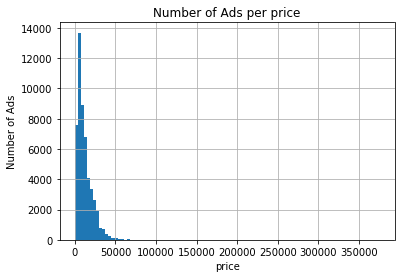

In [6]:
vehicles_us['price'].hist(bins=100).set(xlabel="price", ylabel="Number of Ads", title = "Number of Ads per price")    #>35000 are outliers


Most of the ads are for vehicle prices between 0 and 50,000 range. 
While the number of ads peaked for relatively low priced vehicles at almost 14000, highly priced vehicles above 100000 have very few ads.

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'vehicle_age'),
 Text(0.5, 1.0, 'Number of Ads per vehicle_age')]

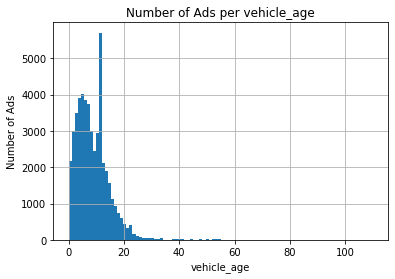

In [7]:
vehicles_us['vehicle_age'].hist(bins=100).set(xlabel="vehicle_age", ylabel="Number of Ads", title = "Number of Ads per vehicle_age")#>25 are outliers

Most of the ads are for vehicle ages ranging from 0 to 20. 
There are very few cars ads for vehciles above 60 years old

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'vehicle_mileage'),
 Text(0.5, 1.0, 'Number of Ads per vehicle_mileage')]

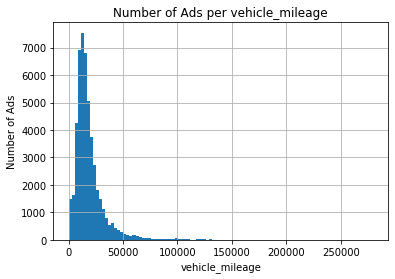

In [8]:
vehicles_us['vehicle_mileage'].hist(bins=100).set(xlabel="vehicle_mileage", ylabel="Number of Ads", title = "Number of Ads per vehicle_mileage")#>38000 are outliers

Most of the vehicle ads are for vehicles between between 0 and 75,000 range mileage. 
While the ads peaked for low mileage vehicles with over 7000 ads, vehicles with mileages above 150000 have very few ads

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'cylinders'),
 Text(0.5, 1.0, 'Number of Ads per cylinders')]

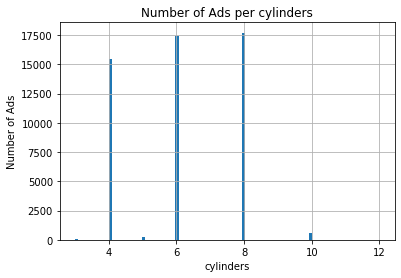

In [9]:
vehicles_us['cylinders'].hist(bins=100).set(xlabel="cylinders", ylabel="Number of Ads", title = "Number of Ads per cylinders")

Most ads are for cars with 4, 6 or 8 cylinders. They all have above 15000 ads each.
Other vehicles have singnificantly low ads less than 1000.

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'condition'),
 Text(0.5, 1.0, 'Number of Ads per condition')]

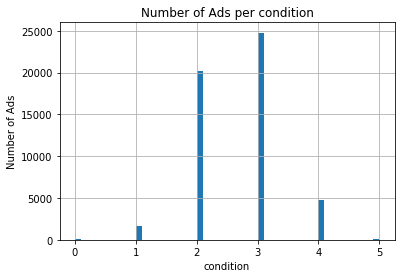

In [10]:
vehicles_us['condition'].hist(bins = 50).set(xlabel="condition", ylabel="Number of Ads", title = "Number of Ads per condition")

Cars with coniditon 3 and 4 have the highest number of ads - each above 20000 ads.
Cars with conditions 1 and 4 have relatively few ads while cars with conditions 0 and 5 have the lowest number of ads.

(-1, 15)

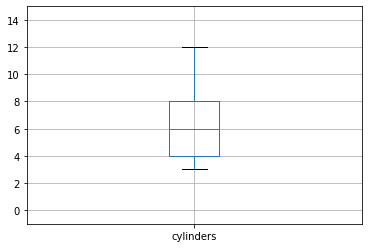

In [11]:

import matplotlib.pyplot as plt 

#vehicles_us.boxplot(column = 'vehicle_mileage')
#plt.ylim(-10000, 50000)

#vehicles_us.boxplot(column = 'price')
#plt.ylim(-10000, 50000)

vehicles_us.boxplot(column = 'cylinders')
plt.ylim(-1, 15)

The outliers are below 4 and above 8

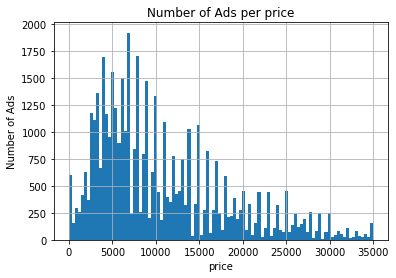

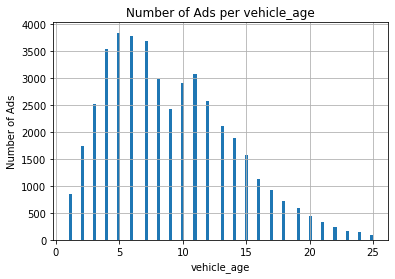

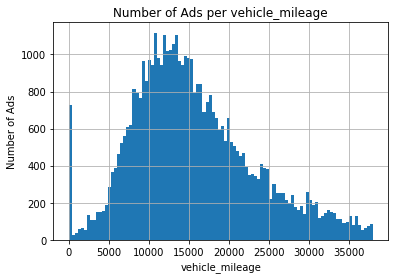

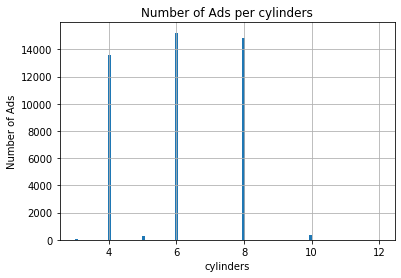

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'condition'),
 Text(0.5, 1.0, 'Number of Ads per condition')]

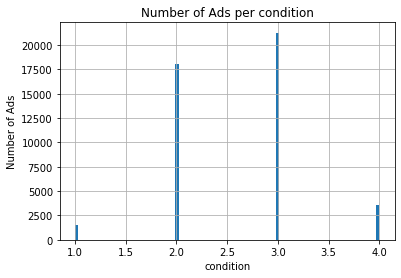

In [12]:
vehicle_outlier = vehicles_us[(vehicles_us['vehicle_age']>25) & (vehicles_us['price'] > 35000) 
                              & (vehicles_us['vehicle_mileage']>38000 )
                              & ((vehicles_us['condition']>4) &  (vehicles_us['condition']<1) )] #outliers


vehicles_us_filtered = vehicles_us[(vehicles_us['vehicle_age']<=25) & (vehicles_us['price'] <= 35000) 
                              & (vehicles_us['vehicle_mileage']<=38000 )
                              & ((vehicles_us['condition']<=4) &  (vehicles_us['condition']>=1) )] #filtered


vehicles_us_filtered['price'].hist(bins=100).set(xlabel="price", ylabel="Number of Ads", title = "Number of Ads per price")
plt.show()
vehicles_us_filtered['vehicle_age'].hist(bins=100).set(xlabel="vehicle_age", ylabel="Number of Ads", title = "Number of Ads per vehicle_age")
plt.show()
vehicles_us_filtered['vehicle_mileage'].hist( bins=100).set(xlabel="vehicle_mileage", ylabel="Number of Ads", title = "Number of Ads per vehicle_mileage")
plt.show()
vehicles_us_filtered['cylinders'].hist(bins=100).set(xlabel="cylinders", ylabel="Number of Ads", title = "Number of Ads per cylinders")
plt.show()
vehicles_us_filtered['condition'].hist(bins=100).set(xlabel="condition", ylabel="Number of Ads", title = "Number of Ads per condition")

Price: for the unfiltered data, the prices are condensed between between 0 and 50,000. Although the peak is weighted close to 0, it is difficult to tell what price exactly peaks. However, looking at the filtered histogram, the peak is clearly between 5000 and 10000.

Vehicle Age: for the unfiltered data, the ages are condensed between between 0 and 20. Although the peak is weighted close to 0, it is difficult to tell what age exactly peaks. However, looking at the filtered histogram, the peak is clearly age 5.

Vehicle Mileage: for the unfiltered data, the mileages are condensed between between 0 and 50000. Although the peak is weighted close to 0, it is difficult to tell what mileage exactly peaks. However, looking at the filtered histogram, the peak is clearly between 10000 and 15000.

Condition:Clearly from both graphs, 2 and 3 are the most preferred categories

i did not filter out w.r.t cylinders

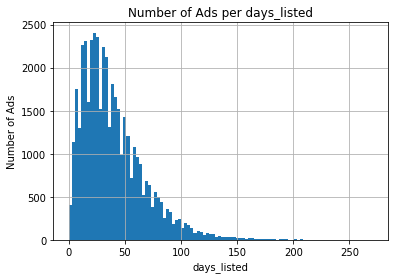

count    44321.000000
mean        39.563006
std         28.232683
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


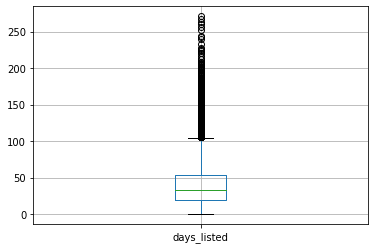

In [13]:
vehicles_us_filtered['days_listed'].hist(bins=100).set(xlabel="days_listed", ylabel="Number of Ads", title = "Number of Ads per days_listed")
plt.show()
print(vehicles_us_filtered['days_listed'].describe())
vehicles_us_filtered.boxplot(column = 'days_listed')

In [14]:
len(vehicles_us_filtered.query('days_listed == 0'))


45

Surprisingly, some ads were removed in short times as low ad 0 days. 45 ads were removed in 0 days.

Mean: 39.6 days
Median = 33 days
The typical lifetime of an ad would be between 19 and 53 days. 
In some cases, the ads were left for an abnormally long time beyond 100 days.

                    price
type                     
bus          17445.913043
truck        14399.341911
offroad      13857.988764
pickup       13853.230432
coupe        12860.636364
convertible  12562.415430
van          10077.562278
SUV           9958.260168
other         9570.162791
wagon         8647.202488
mini-van      7357.129377
sedan         6516.698838
hatchback     6417.109307


[Text(0, 0.5, 'price'),
 Text(0.5, 0, 'car_type'),
 Text(0.5, 1.0, 'Price per car_type')]

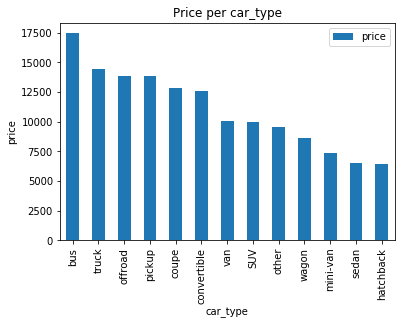

In [15]:
vehicles_us_filtered_type_price = vehicles_us_filtered.pivot_table(index = 'type', values = 'price', aggfunc ='mean').sort_values(by = 'price', ascending =False)
print(vehicles_us_filtered_type_price)
vehicles_us_filtered_type_price.plot(kind = 'bar').set(xlabel="car_type", ylabel="price", title = "Price per car_type")

Buses have the highest average price whie hatchbacks have the lowest car price

The most expensive vehivles are buses, trucks and offroads respectively with prices above 12500. The cheapest vehicles are mini-vans, sedans and hatchbacks priced beow 7500.

The average price of a bus 17500 is almost thrice the price of the cheapest vehicle, hatchback. 

[Text(0, 0.5, 'Number of Ads'),
 Text(0.5, 0, 'car_type'),
 Text(0.5, 1.0, 'Number of Ads per car_type')]

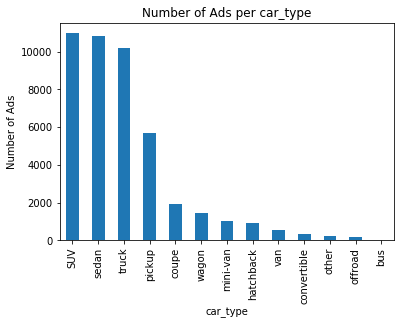

In [16]:
vehicles_us_filtered['type'].value_counts().plot(kind ='bar').set(xlabel="car_type", ylabel="Number of Ads", title = "Number of Ads per car_type")

SUV and Sedan have the highest mumber of ads with 10966 and 10848 ads each.

Text(0.5, 1.0, 'sedan:Color influence on prices')

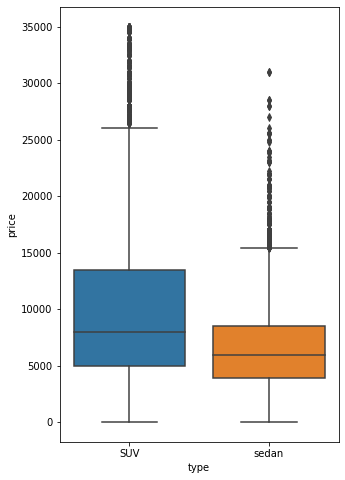

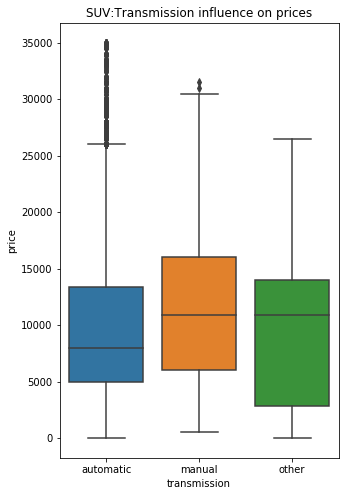

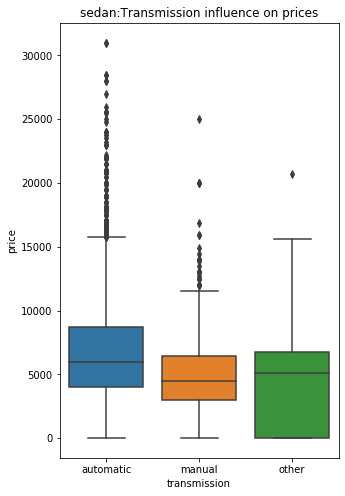

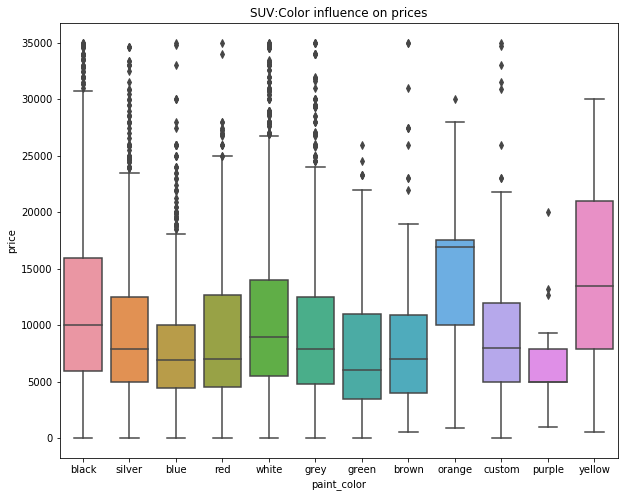

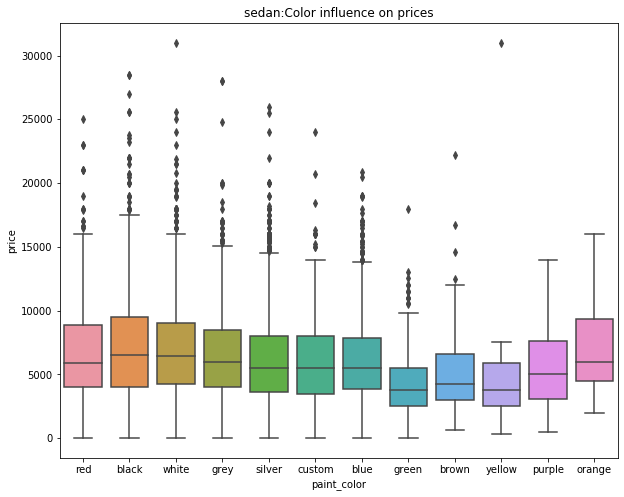

In [17]:
import seaborn as sns 
plt.figure(figsize=(5, 8))
sns.boxplot(x="type", y = "price" ,data = vehicles_us_filtered.query('type == "SUV" | type == "sedan"'))

plt.figure(figsize=(5, 8))
sns.boxplot(x="transmission", y = "price" ,data = vehicles_us_filtered.query('type == "SUV"'))
plt.title("SUV:Transmission influence on prices")

plt.figure(figsize=(5, 8))
sns.boxplot(x="transmission", y = "price" ,data = vehicles_us_filtered.query('type == "sedan"'))
plt.title("sedan:Transmission influence on prices")


plt.figure(figsize=(10, 8))
sns.boxplot(x="paint_color", y = "price" ,data = vehicles_us_filtered.query('type == "SUV"'))
plt.title("SUV:Color influence on prices")


plt.figure(figsize=(10, 8))
sns.boxplot(x="paint_color", y = "price" ,data = vehicles_us_filtered.query('type == "sedan"'))
plt.title("sedan:Color influence on prices")


Based on transmission for SUVs, manual is more priced while for sedans automatic is more priced.

Colors yellow and orange are attracts more price for SUVs while black and orange are the most priced for sedans.

<Figure size 720x576 with 0 Axes>

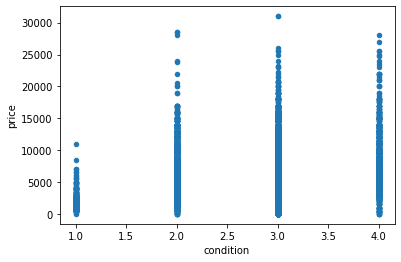

<Figure size 720x576 with 0 Axes>

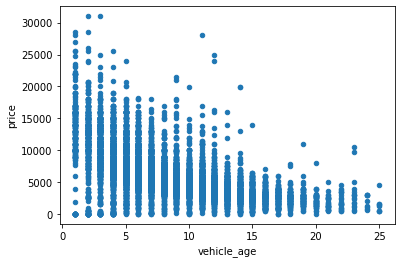

<Figure size 720x576 with 0 Axes>

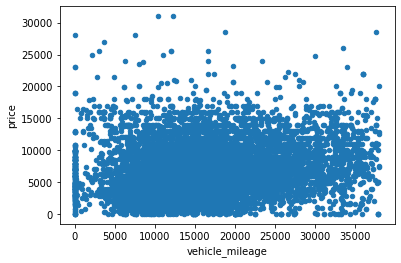

<Figure size 720x576 with 0 Axes>

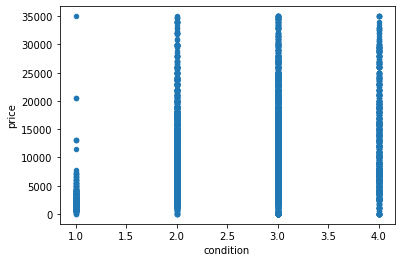

<Figure size 720x576 with 0 Axes>

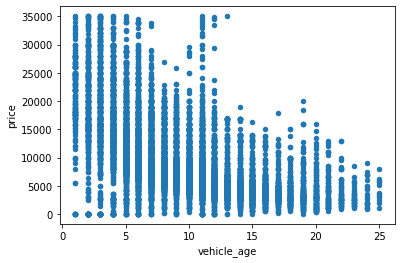

<Figure size 720x576 with 0 Axes>

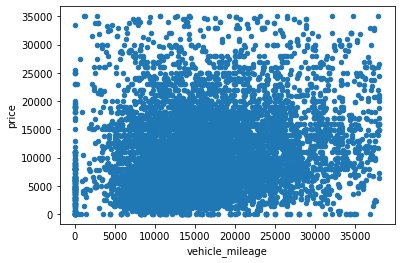

In [18]:
#age, mileage, condition, 
plt.figure(figsize=(10, 8))
vehicles_us_filtered.query('type == "sedan"').plot.scatter(x = 'condition', y ='price')

plt.figure(figsize=(10, 8))
vehicles_us_filtered.query('type == "sedan"').plot.scatter(x = 'vehicle_age', y ='price')

plt.figure(figsize=(10, 8))
vehicles_us_filtered.query('type == "sedan"').plot.scatter(x = 'vehicle_mileage', y ='price')

plt.figure(figsize=(10, 8))
vehicles_us_filtered.query('type == "SUV"').plot.scatter(x = 'condition', y ='price')

plt.figure(figsize=(10, 8))
vehicles_us_filtered.query('type == "SUV"').plot.scatter(x = 'vehicle_age', y ='price')

plt.figure(figsize=(10, 8))
vehicles_us_filtered.query('type == "SUV"').plot.scatter(x = 'vehicle_mileage', y ='price')


#plt.figure(figsize=(10, 8))
#vehicles_us_filtered.query(
#    'type == "SUV"').plot.scatter(x = 'condition', y ='vehicle_mileage', c= 'vehicle_age')

Condition wise, sedan cars are more priced when the are like new or excellent. However, with an exception of aything below fair and salvage condition for SUVs, condition don't really matter becuase people still purchase like, new, excellent and good at high prices.

The age of the vehicles affects the prices of sedans than SUVs. Once acan observe a drastic decline in sedans prices as the car ages. Prices above 5000 are scaece after 20 years of age. Althought he age also affects the SUV prices too, but less significantly like the sedan. Even after 20 years, SUVs are still prices above 5000.

In [19]:
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr

rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

In [20]:
#pairplot of age, mileage, condition, transmission type, and color for sedan
#sb.pairplot(vehicles_us_filtered.query('type == "sedan"')[['price','vehicle_mileage','vehicle_age','condition']])

PearsonR Coeff between Sedan Price and Sedan Mileage:  0.21910331221114426
PearsonR Coeff between Sedan Price and Sedan Age:  -0.6147749975529948
PearsonR Coeff between Sedan Price and Sedan Condition:  0.28609677951176743


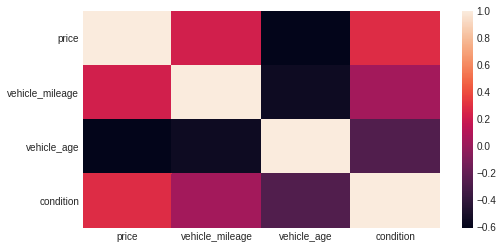

In [21]:
#PEARSON CORRELATION BETWEEN PRICE AND MILEAGE,AGE, CONDITION.- SEDAN

pearsonr_coefficient, p_value = pearsonr(
    vehicles_us_filtered.query('type == "sedan"')['price'],vehicles_us_filtered.query('type == "sedan"')['vehicle_mileage'])
print('PearsonR Coeff between Sedan Price and Sedan Mileage: ', pearsonr_coefficient)


pearsonr_coefficient, p_value = pearsonr(
    vehicles_us_filtered.query('type == "sedan"')['price'],vehicles_us_filtered.query('type == "sedan"')['vehicle_age'])
print('PearsonR Coeff between Sedan Price and Sedan Age: ', pearsonr_coefficient)

pearsonr_coefficient, p_value = pearsonr(
    vehicles_us_filtered.query('type == "sedan"')['price'],vehicles_us_filtered.query('type == "sedan"')['condition'])
print('PearsonR Coeff between Sedan Price and Sedan Condition: ', pearsonr_coefficient)

sedan_price_corr = vehicles_us_filtered.query('type == "sedan"')[['price','vehicle_mileage','vehicle_age','condition']].corr()

sb.heatmap(sedan_price_corr)


For sedan cars, the vehice age shows the highest correlation with Price.The vehicle age has a relatively strong relationship of -0.6 with the Price. 

In [22]:
#pairplot of age, mileage, condition, transmission type, and color for SUV
#sb.pairplot(vehicles_us_filtered.query('type == "SUV"')[['price','vehicle_mileage','vehicle_age','condition']])

PearsonR Coeff between SUV Price and SUV Mileage:  0.24995220707106983
PearsonR Coeff between SUV Price and SUV Age:  -0.5890188861237307
PearsonR Coeff between SUV Price and SUV Condition:  0.26224977822735074


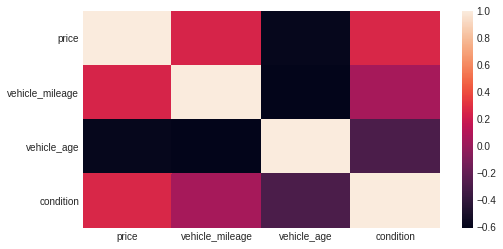

In [23]:
#PEARSON CORRELATION BETWEEN PRICE AND MILEAGE,AGE, CONDITION.- SUV

pearsonr_coefficient, p_value = pearsonr(
    vehicles_us_filtered.query('type == "SUV"')['price'],vehicles_us_filtered.query('type == "SUV"')['vehicle_mileage'])
print('PearsonR Coeff between SUV Price and SUV Mileage: ', pearsonr_coefficient)


pearsonr_coefficient, p_value = pearsonr(
    vehicles_us_filtered.query('type == "SUV"')['price'],vehicles_us_filtered.query('type == "SUV"')['vehicle_age'])
print('PearsonR Coeff between SUV Price and SUV Age: ', pearsonr_coefficient)

pearsonr_coefficient, p_value = pearsonr(
    vehicles_us_filtered.query('type == "SUV"')['price'],vehicles_us_filtered.query('type == "SUV"')['condition'])
print('PearsonR Coeff between SUV Price and SUV Condition: ', pearsonr_coefficient)

suv_price_corr = vehicles_us_filtered.query('type == "SUV"')[['price','vehicle_mileage','vehicle_age','condition']].corr()

sb.heatmap(suv_price_corr)



For SUV cars, the vehice age shows the highest correlation with Price.The vehicle age has a relatively strong relationship of -0.58 with the Price. 

The exploratory data anaylsis showed that several attributes affects the vehicle prices differently. 
The color, transmission type, vehicle_age, vehicle_mileage and condition all have some influence on the vehicle price, the highest correlation is shown by the vehicle age. 

# Step 5. Overall conclusion

The raws vehicle_us data shows 51525 entries with missing values totalling 51991 of which more than half needed to be filled. This was too much of rows to be dropped, hence the need to be filled.
I employed the use of some statical mean, median and mode where necessary tofill the missing values of the model_year, cylinders, odometer and  paint_color.

Exploratory data analysis revealed outliers in price, age, mileage and condition and upon filtering ou the outliers, the 44321 ads showed clearer insights.

Although, pricing for specific types SUV and sedan which i analysed is influenced by various factors, overall, the factors that influence the price the most would be vehicle age, condition and transmission type. 

Conclusively, using the PearsonR correlation, vehicle age shows the strongest correlation with price, albeit negatively. Hence, one can conclude that the Vehicle price reduces as the vehicle age increases.